In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('ratings.csv', names=['user_id', 'movie_id', 'rating' ],
                   usecols=[0, 1, 2])

In [ ]:
data = data[1:]

In [ ]:
data["user_id"] = data['user_id'].astype('int')
data["movie_id"] = data['movie_id'].astype('int')
data["rating"] = data['rating'].astype('int')

In [ ]:
data.describe()

,user_id,movie_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


### Highest rated movie

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data.dtypes

user_id     int64
movie_id    int64
rating      int64
dtype: object

In [ ]:
data.groupby('movie_id')['rating'].sum()

movie_id
1       1753
2        420
3        273
4        742
5        284
        ... 
1678       1
1679       3
1680       2
1681       3
1682       3
Name: rating, Length: 1682, dtype: int64

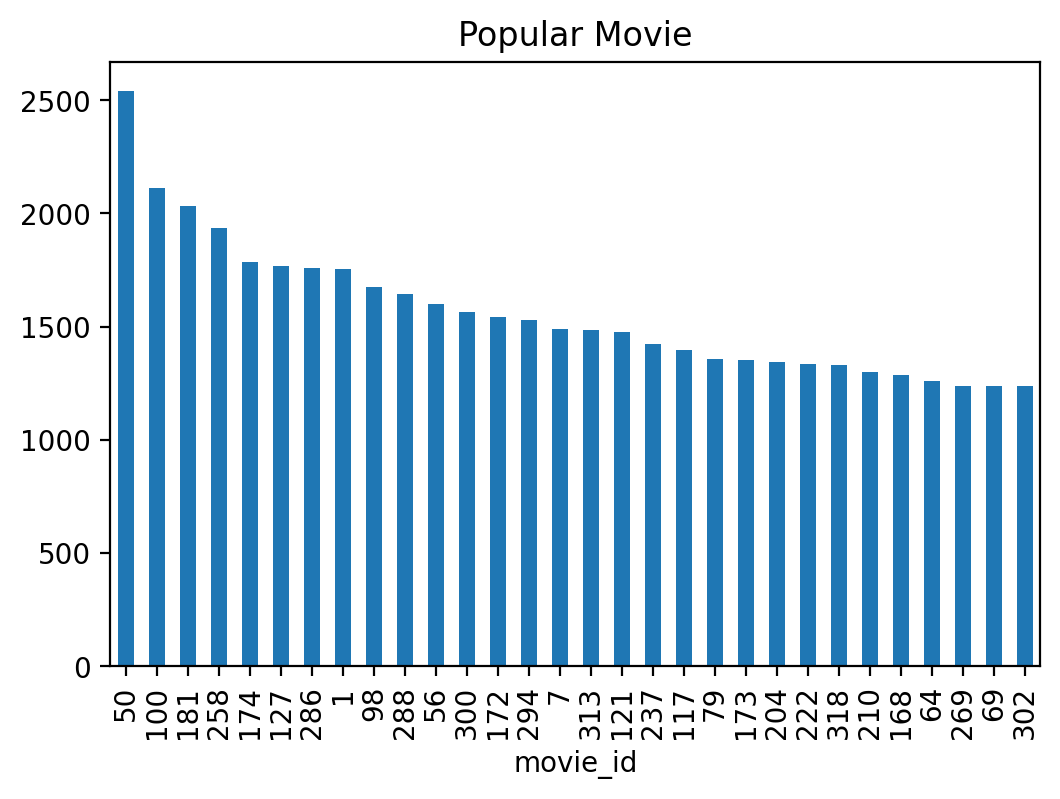

In [ ]:
fig, ax = plt.subplots(dpi=200)
plt.title('Popular Movie')
data.groupby('movie_id')['rating'].sum().sort_values(ascending=False)[:30].plot(kind='bar')
plt.show()

In [ ]:
most_viewed = data.groupby('movie_id')['user_id'].count().sort_values(ascending=False)[:30]

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


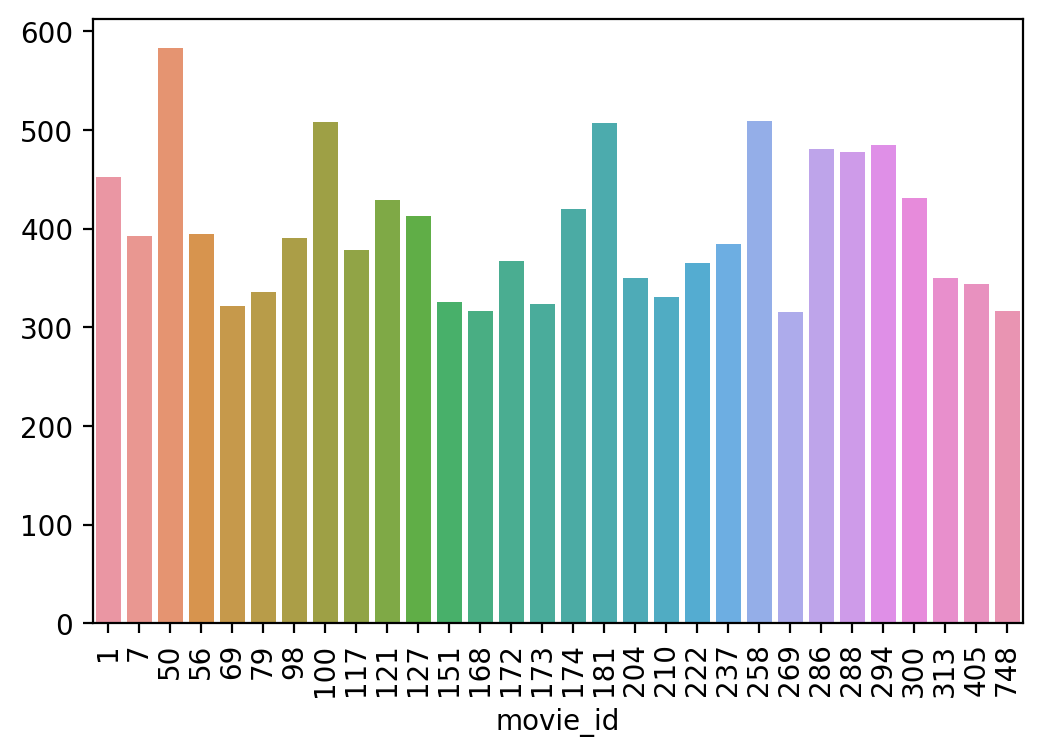

In [ ]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(most_viewed.index, most_viewed.values, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [ ]:
less_viewed = data.groupby('movie_id')['user_id'].count().sort_values()[:30]

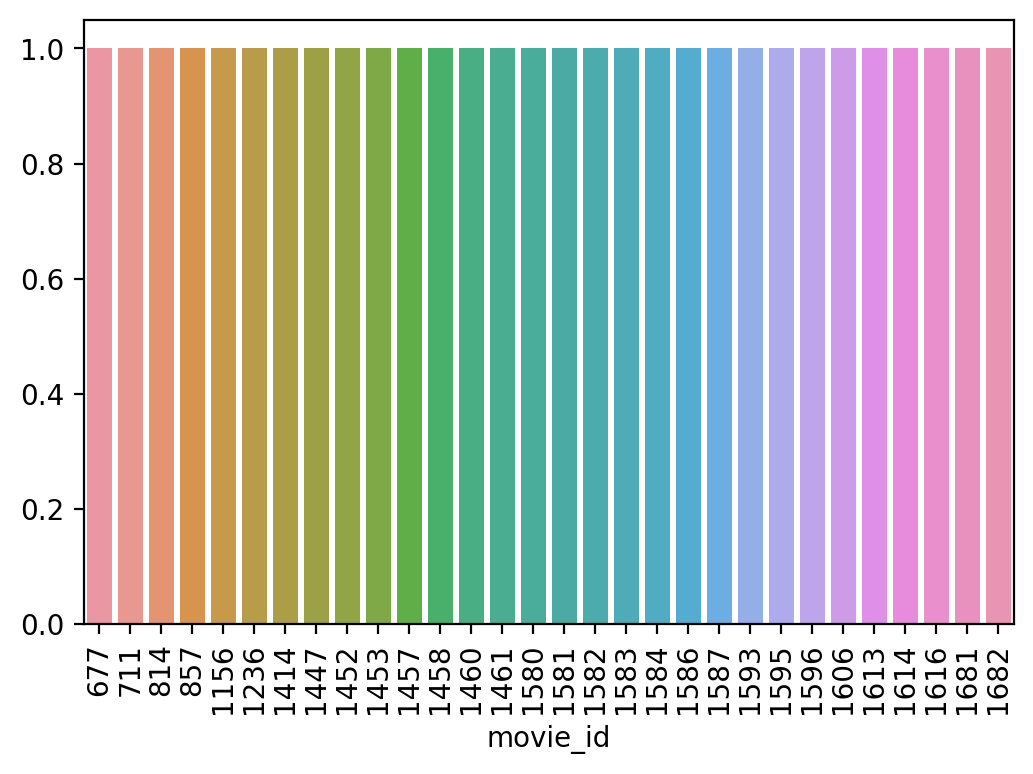

In [ ]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(less_viewed.index, less_viewed.values, ax=ax)
plt.xticks(rotation=90)
plt.show()

    hmm by exploring this data i come at  a conclusion that i can not use avg rating directly

In [ ]:
most_viewed = data.groupby('movie_id')['user_id'].count()

In [ ]:
most_viewed.describe()

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: user_id, dtype: float64

### highly scattered data so wee need a good thresh hold value

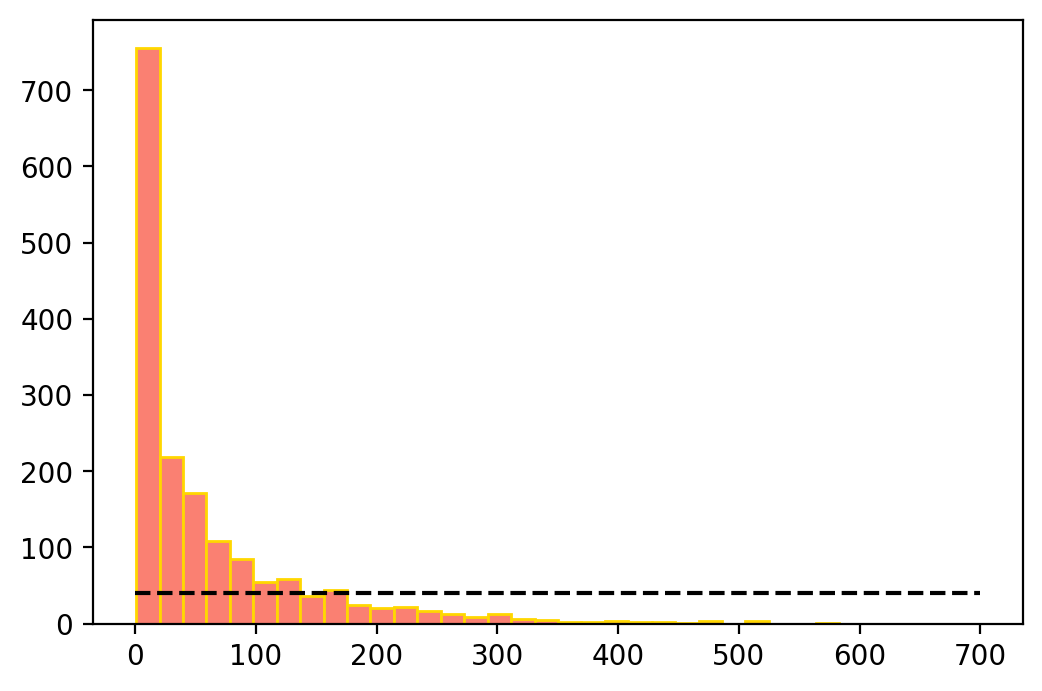

In [ ]:
plt.figure(dpi=200)
plt.hist(most_viewed, bins=30, color='salmon', ec='gold')
plt.plot([0, 700], [40, 40], 'k--')
plt.show()

In [ ]:
data

,user_id,movie_id,rating
1,196,242,3
2,186,302,3
3,22,377,1
4,244,51,2
5,166,346,1
...,...,...,...
99996,880,476,3
99997,716,204,5
99998,276,1090,1
99999,13,225,2


In [ ]:
df = data.set_index('movie_id').drop('user_id', axis=1)

In [ ]:
df.head()

,rating
movie_id,
242,3
302,3
377,1
51,2
346,1


In [ ]:
import numpy as np

In [ ]:
df1 = data.groupby('movie_id').agg({'user_id': np.size})

In [ ]:
df1.head()

,user_id
movie_id,
1,452
2,131
3,90
4,209
5,86


In [ ]:
df1.shape

(1682, 1)

In [ ]:
df1 = df1[df1['user_id']>25]

In [ ]:
df1.columns = [ 'views']

In [ ]:
df1.head()

,views
movie_id,
1,452
2,131
3,90
4,209
5,86


In [ ]:
df1.min()

views    26
dtype: int64

In [ ]:
df1.max()

views    583
dtype: int64

### Normalization Coefficient

$$ coeff_i = \frac { (x_i - min(X)) } { (max(X) - min(X) }$$ 

In [ ]:
mx = df1['views'].max()
mi = df1['views'].min()
df1['popularity'] = df1['views'].apply( lambda value: ( ( value - mi ) / ( mx - mi )  ) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1.head()

,views,popularity
movie_id,,
1,452,0.764811
2,131,0.188510
3,90,0.114901
4,209,0.328546
5,86,0.107720


In [ ]:
df1.drop('views', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.head()

,popularity
movie_id,
1,0.764811
2,0.188510
3,0.114901
4,0.328546
5,0.107720


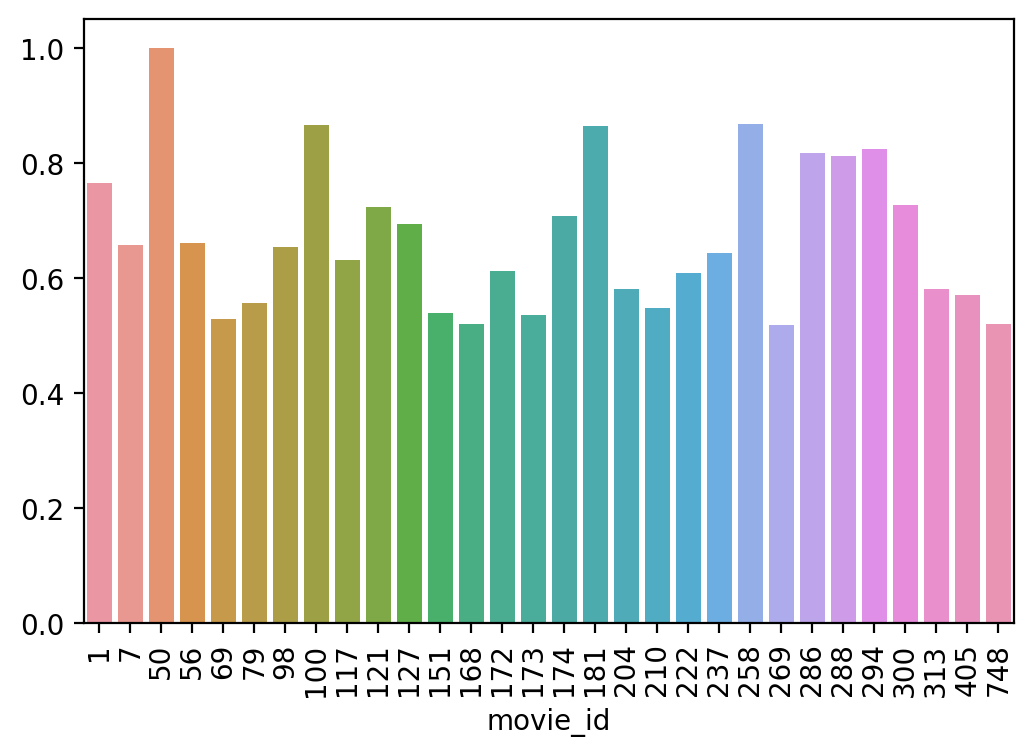

In [ ]:
ms = df1['popularity'].sort_values(ascending=False)[:30]
plt.figure(dpi=200)
sns.barplot(ms.index, ms.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1.head()

,popularity
movie_id,
1,0.764811
2,0.188510
3,0.114901
4,0.328546
5,0.107720


In [ ]:
df.head()

,rating
movie_id,
242,3
302,3
377,1
51,2
346,1


In [ ]:
rating = pd.merge(df, df1, on='movie_id')

In [ ]:
rating.head()

,rating,popularity
movie_id,,
242,3,0.163375
242,3,0.163375
242,5,0.163375
242,3,0.163375
242,5,0.163375


In [ ]:
df.shape

(100000, 1)

In [ ]:
df1.shape

(858, 1)

In [ ]:
rating.shape

(93146, 2)

In [ ]:
rating.loc[50, ].head()

,rating,popularity
movie_id,,
50,5,1.0
50,4,1.0
50,5,1.0
50,5,1.0
50,5,1.0


In [ ]:
rating = rating.groupby(level=0).agg({
    'rating': np.mean,
    'popularity': np.mean
    
})

In [ ]:
rating.head()

,rating,popularity
movie_id,,
1,3.878319,0.764811
2,3.206107,0.188510
3,3.033333,0.114901
4,3.550239,0.328546
5,3.302326,0.107720


In [ ]:
!head ml-100k/u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

u.item 

            -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.

In [ ]:
names = [ 'movie_id', 'movie title', 'Action', 'Adventure', 'Animation', 
          "Children's", "Comedy", "Crime", "Documentary", "Drama",  "Fantasy", 
          "Film-Noir", "Horror", "Musical",  "Mystery", "Romance", "Sci-Fi",
          "Thriller", "War", "Western" ]
cols = [ 0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [ ]:
movie = pd.read_csv('movie.csv', encoding='latin1',sep="|",
                   usecols=cols, names=names, index_col='movie_id')

In [ ]:
movie.head()
movie = movie[1:]

##### movie_name[50] -> name

In [ ]:
movie_name = movie[['movie title']]

In [ ]:
movie_name.loc[50]

movie title    Star Wars (1977)
Name: 50, dtype: object

In [ ]:
rating[rating['popularity'] == 0 ].head(1)

,rating,popularity
movie_id,,
6,3.576923,0.0


In [ ]:
movie_name.loc[6]

movie title    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
Name: 6, dtype: object

In [ ]:
movie.drop('movie title', axis=1, inplace=True)

In [ ]:
movie.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = pd.merge(rating, movie, on='movie_id')

In [ ]:
features.head()

,rating,popularity,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,
2,3.206107,0.188510,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.033333,0.114901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.550239,0.328546,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,3.302326,0.107720,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,3.576923,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
https://colab.research.google.com/drive/1lY8M8-NgCj7o54NSTjxwkOMYonIXLFFH?usp=sharing

    Recommandation -> features 

In [ ]:
features.head()

,rating,popularity,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,
2,3.206107,0.188510,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.033333,0.114901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.550239,0.328546,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,3.302326,0.107720,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,3.576923,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


`Feature Elimination or Feature Selection`

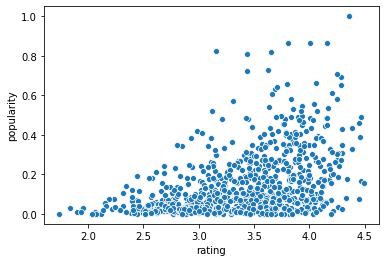

In [ ]:
sns.scatterplot('rating', 'popularity', data=features)
plt.show()

In [ ]:
np.corrcoef(features['rating'], features['popularity'])


array([[1.        , 0.40786617],
       [0.40786617, 1.        ]])

for rating and popularity the `distance matrix` will be `Euclidean Distance`

$$ d_i \quad = \quad \sqrt { {(x_o - x_i)}^2 + {(y_o - y_i)^2}  } $$

here $x_o$ and $y_o$ are observed point

for geners the `distance matrix` will be `cosine matrix`

$$ \text {Cosine Distance} \quad = \quad \frac { \sum\limits_{i=1}^N \quad x_i. y_i }  { \sqrt { \sum\limits_{i=1}^N \quad x_i^2 }  \sqrt  { \sum\limits_{i=1}^N \quad y_i^2} } $$

In [ ]:
from scipy.spatial.distance import euclidean, cosine

In [ ]:
euclidean(v1, v2)

3.0

In [ ]:
cosine(v1, v2)

0.8174258141649446

In [ ]:
m1 = features.loc[50]

In [ ]:
m2 = features.loc[2]

In [ ]:
euclidean(m1, m2)

2.4467334154809284

In [ ]:
cosine(m1, m2)

0.11407084977073711

In [ ]:
euclidean(m1[:2], m2[:2])

1.409434073105574

In [ ]:
cosine(m1[:2], m2[:2])

0.013879613075180597

In [ ]:
euclidean(m1[2:], m2[2:])

2.0

In [ ]:
cosine(m1[2:], m2[2:])

0.4836022205056777

In [ ]:
cosine(m1[2:], m2[2:]) + euclidean(m1[:2], m2[:2])

1.8930362936112517

In [ ]:
target = movie_name

In [ ]:
target.head()

,movie title
movie_id,
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...


In [ ]:
def distance(mid_1, mid_2):
    m1 = features.loc[mid_1]
    m2 = features.loc[mid_2]
    rp_dis = euclidean(m1[:2], m2[:2])
    gen_dis = cosine(m1[2:], m2[2:])
    return rp_dis + gen_dis
    

In [ ]:
distance(3, 50)

2.593562511080913

In [ ]:
def similar_movies(mid, k=5):
    neighbours = []
    for new_id in features.index:
        if mid != new_id:
            d = distance(mid, new_id)
            name = movie_name.loc[new_id]['movie title']
            neighbours.append( (d, name) )
    neighbours.sort()
    return [ name for d, name in neighbours[:k]]

In [ ]:
similar_movies(50, k=10)

['Return of the Jedi (1983)',
 'Empire Strikes Back, The (1980)',
 'Raiders of the Lost Ark (1981)',
 'Princess Bride, The (1987)',
 'African Queen, The (1951)',
 'Titanic (1997)',
 'Indiana Jones and the Last Crusade (1989)',
 'Aliens (1986)',
 'Star Trek: First Contact (1996)',
 'Braveheart (1995)']

In [ ]:
movie_name[movie_name['movie title'].str.startswith('God')]

,movie title
movie_id,
127,"Godfather, The (1972)"
187,"Godfather: Part II, The (1974)"


In [ ]:
similar_movies(127, k=10)

['Godfather: Part II, The (1974)',
 'Pulp Fiction (1994)',
 'Titanic (1997)',
 'Fargo (1996)',
 'Braveheart (1995)',
 'Raiders of the Lost Ark (1981)',
 'Silence of the Lambs, The (1991)',
 'Empire Strikes Back, The (1980)',
 'GoodFellas (1990)',
 "One Flew Over the Cuckoo's Nest (1975)"]